# Analysis Primer


## Using the `ecris.analysis` package to view and modify CSD files

Use the `pathlib` library to define a path to the CSD file of interest, make sure this is the `csd` file and that the datasheet file `dsht` is in the same directory

In [15]:
from pathlib import Path
csd_path = Path('../ecris.csd.viewer/data/csd_1743103884')
csd_path.exists()

True

Load the file into a `CSD` object using the function `read_csd_from_file_pair`

In [16]:
from ops.ecris.analysis.io.read_csd_file import read_csd_from_file_pair
csd = read_csd_from_file_pair(csd_path)

The `CSD` object contains all the parsed data on the CSD:

In [17]:
import numpy as np

print(csd.timestamp)
print(csd.dipole_current)
print(csd.beam_current)
print(csd.time)

# Raw Data
print(np.shape(csd.data))

2025-03-27 12:31:24
[3.34580e+07 3.35910e+07 3.37240e+07 ... 1.08823e+08 1.08864e+08
 1.08905e+08]
[0.0714788 0.0458844 0.0589791 ... 0.142492  0.107639  0.168885 ]
[1.74310389e+09 1.74310389e+09 1.74310389e+09 ... 1.74310390e+09
 1.74310390e+09 1.74310390e+09]
(1200, 4)


The CSD does not have an `m_over_q` set yet, this must be found by fitting.

In [18]:
print(csd.m_over_q is None)

True


The `m_over_q` value can be estimated using the constant $\alpha$, this does not modify the CSD in place but returns the M/Q array

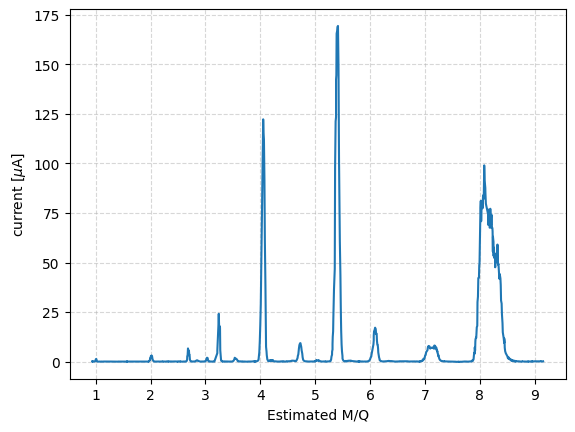

In [ ]:
import matplotlib.pyplot as plt
from ops.ecris.analysis.csd.m_over_q import estimate_m_over_q

csd.m_over_q = estimate_m_over_q(csd)
plt.plot(csd.m_over_q, csd.beam_current)
plt.grid(alpha=0.5, ls='--')
plt.xticks(range(1, 10))
plt.ylabel(r'current [$\mu$A]')
plt.xlabel('Estimated M/Q')
plt.show()

To scale the M/Q array using an element with expected peaks, use the function `rescale_with_element` and an `Element` object. Note that this _does_ change the CSD in place

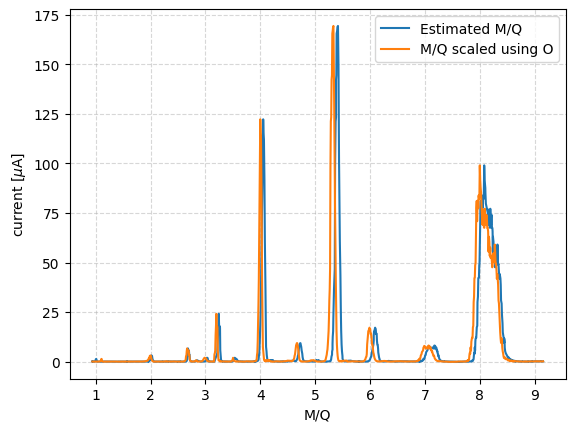

In [ ]:
from ops.ecris.analysis.csd.m_over_q import rescale_with_element
from ops.ecris.analysis.model.element import Element

csd = read_csd_from_file_pair(csd_path)
csd.m_over_q = estimate_m_over_q(csd)
oxygen = Element('Oxygen', 'O', atomic_mass=16, atomic_number=8)
plt.plot(csd.m_over_q, csd.beam_current, label='Estimated M/Q')
rescale_with_element(csd, oxygen)
plt.plot(csd.m_over_q, csd.beam_current, label=r'M/Q scaled using O')
plt.grid(alpha=0.5, ls='--')
plt.xticks(range(1, 10))
plt.ylabel(r'current [$\mu$A]')
plt.xlabel('M/Q')
plt.legend()
plt.show()

For ease of use, there is a function that automatically estimates and then rescales the M/Q value using Oxygen, as well as a plotting tool

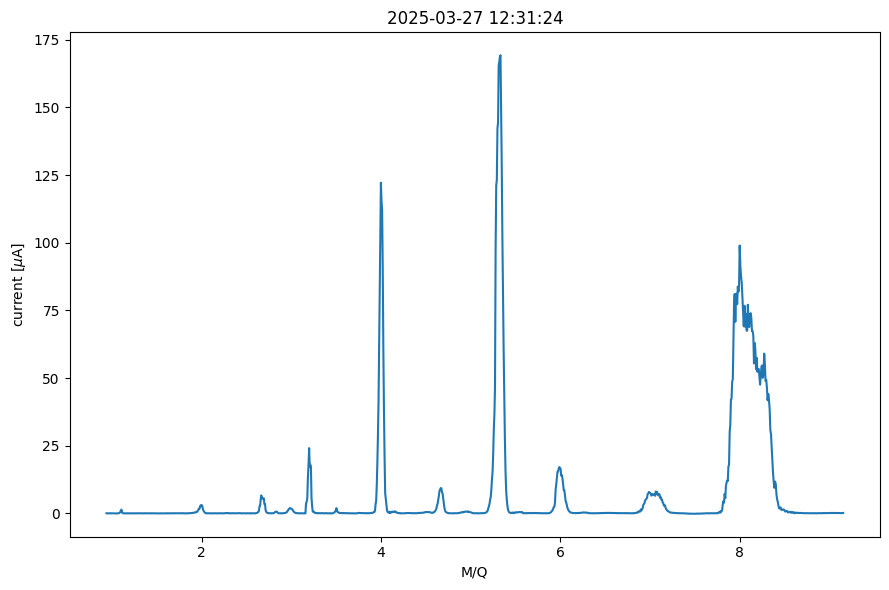

In [ ]:
from ops.ecris.analysis.csd.m_over_q import rescale_with_oxygen
from ops.ecris.analysis.plot import plot_csd

csd = None
csd = read_csd_from_file_pair(csd_path)
rescale_with_oxygen(csd)
fig = plot_csd(csd)